# Decision Trees w/ MNIST

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': u'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(mnist['data'], mnist['target'], test_size=0.2, random_state=42)

print( "\nTraining Percentages:\n" )
print(train_X.shape[0]/len(mnist['data']))
print(train_Y.shape[0]/len(mnist['data']))


Training Percentages:

0.8
0.8


Let's look at a number.

In [4]:
# No shaping
myNumber = train_X[5]
myNumberLabel = train_Y[5]
myNumber2 = train_X[7]
myNumberLabel2 = train_Y[7]
print (myNumber)
print (myNumberLabel)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 113 253 132  51  41   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  51 232 213 252 243 203  82   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 163
 254 253 254 213  92  31   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  71 151 253 252 253 232  41   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  21 142 234 253 254  71   0   0   

In [5]:
## Shape it into the 28x28 image.
myNumber = myNumber.reshape((28,28))
print(myNumber.shape)
for x in myNumber: print (' '.join('%s'%n for n in x))

(28L, 28L)
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 113 253 132 51 41 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 51 232 213 252 243 203 82 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 163 254 253 254 213 92 31 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 71 151 253 252 253 232 41 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 21 142 234 253 254 71 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 112 252 253 151 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 11 92 214 253 254 253 254 131 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 21 142 213 252 253 252 253 212 151 30 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 82 254 253 254 213 142 61 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 123 243 253 212 50 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 193 253 254 213 152 152 152 152 152 71 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 

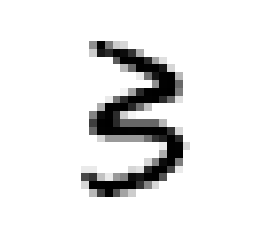

In [6]:
plt.imshow(myNumber, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(train_X,train_Y)
y_pred = classifier.predict(train_X)
print ("Accuracy on Training: ",sum(y_pred==train_Y)/len(train_Y))

y_pred = classifier.predict(test_X)
print ("Accuracy on Training: ",sum(y_pred==test_Y)/len(test_Y))
myNumber = myNumber.reshape(1,-1)
print ('Prediction on myNumber: %i'%classifier.predict(myNumber))

Accuracy on Training:  0.342303571429
Accuracy on Training:  0.340714285714
Prediction on myNumber: 3


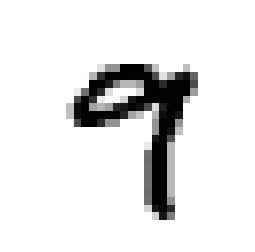

Prediction on myNumber: 3


In [9]:
plt.imshow(myNumber2.reshape((28,28)), cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
myNumber2 = myNumber2.reshape(1,-1)
print ('Prediction on myNumber: %i'%classifier.predict(myNumber2))

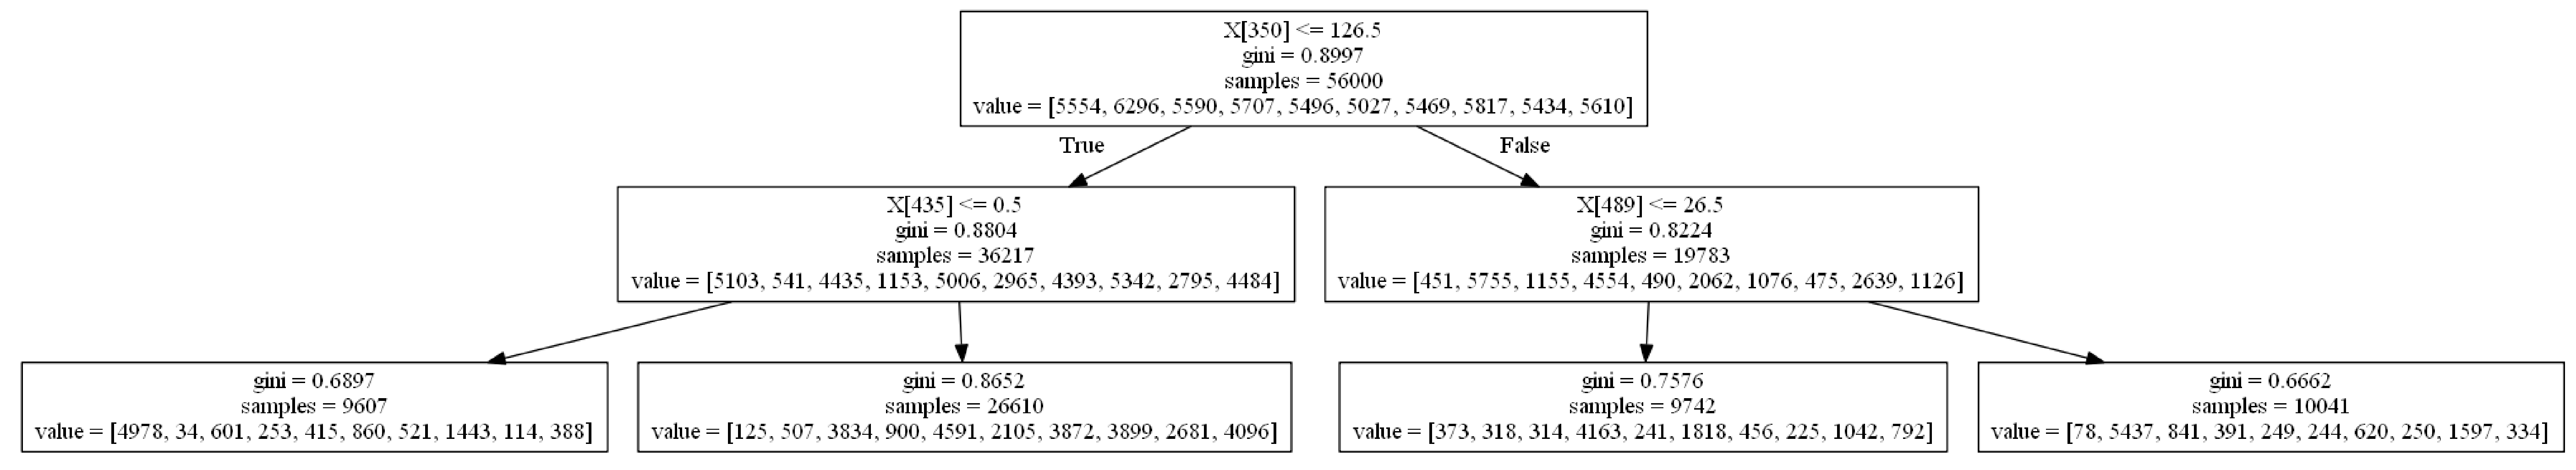

In [10]:
import StringIO
from sklearn import tree
#from graphviz import *

import matplotlib.image as mpimg
import pydotplus

dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(classifier, out_file = dotfile)
dotfile.close()
dot_data = StringIO.StringIO()
tree.export_graphviz(classifier, out_file=dot_data)
graph = pydotplus.graph_from_dot_file("dtree2.dot")
graph.write_png('test.png')
img=mpimg.imread('test.png')
fig = plt.figure(figsize=(100, 100)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(train_X,train_Y)
y_pred = classifier.predict(train_X)
print ("Accuracy on Training: ",sum(y_pred==train_Y)/len(train_Y))

y_pred = classifier.predict(test_X)
print ("Accuracy on Training: ",sum(y_pred==test_Y)/len(test_Y))

Accuracy on Training:  0.437642857143
Accuracy on Training:  0.440071428571


In [12]:
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(train_X,train_Y)
y_pred = classifier.predict(train_X)
print ("Accuracy on Training: ",sum(y_pred==train_Y)/len(train_Y))

y_pred = classifier.predict(test_X)
print ("Accuracy on Training: ",sum(y_pred==test_Y)/len(test_Y))

Accuracy on Training:  0.657803571429
Accuracy on Training:  0.657357142857


In [13]:
classifier = DecisionTreeClassifier(max_depth=7)
classifier.fit(train_X,train_Y)
y_pred = classifier.predict(train_X)
print ("Accuracy on Training: ",sum(y_pred==train_Y)/len(train_Y))

y_pred = classifier.predict(test_X)
print ("Accuracy on Training: ",sum(y_pred==test_Y)/len(test_Y))

Accuracy on Training:  0.782732142857
Accuracy on Training:  0.774428571429


In [14]:
classifier = DecisionTreeClassifier(max_depth=9)
classifier.fit(train_X,train_Y)
y_pred = classifier.predict(train_X)
print ("Accuracy on Training: ",sum(y_pred==train_Y)/len(train_Y))

y_pred = classifier.predict(test_X)
print ("Accuracy on Training: ",sum(y_pred==test_Y)/len(test_Y))

Accuracy on Training:  0.866678571429
Accuracy on Training:  0.838428571429


In [ ]:
plt.imshow(myNumber2.reshape((28,28)), cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
myNumber2 = myNumber2.reshape(1,-1)
print ('Prediction on myNumber: %i'%classifier.predict(myNumber2))

In [ ]:
classifier = DecisionTreeClassifier(max_depth=2, criterion='entropy')
classifier.fit(train_X,train_Y)
y_pred = classifier.predict(train_X)
print ("Accuracy on Training: ",sum(y_pred==train_Y)/len(train_Y))

y_pred = classifier.predict(test_X)
print ("Accuracy on Training: ",sum(y_pred==test_Y)/len(test_Y))

In [ ]:
import StringIO
from sklearn import tree
#from graphviz import *

import matplotlib.image as mpimg
import pydotplus

dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(classifier, out_file = dotfile)
dotfile.close()
dot_data = StringIO.StringIO()
tree.export_graphviz(classifier, out_file=dot_data)
graph = pydotplus.graph_from_dot_file("dtree2.dot")
graph.write_png('test.png')
img=mpimg.imread('test.png')
fig = plt.figure(figsize=(100, 100)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()

### Where are those pixels use first?

In [ ]:
shell = np.zeros(28*28)
shell[350]=1
shell[461]=2
shell = shell.reshape((28,28))
for x in shell: print (' '.join('%i'%n for n in x))